## Pergunta: Coloque um cabeçalho nesse notebook com o seu nome e resumindo o que descobriu ao explorar esses dados

## Formação Data Science Alura - Análise exploratória do MovieLens

Na formação de Data Scienda www.alura.com.br um dos conjuntos de dados que utilizamos é o de avaliações para filmes no site MovieLens. Neste projeto faremos uma análise exploratória desses dados.

### Dicas para o projeto completo:

- todo gráfico deve ter um título, labels e legendas que fazem sentido
- configure um tamanho adequado para os gráficos
- utilize as versões dos arquivos de dados disponíveis no github

## Pergunta: conferindo as versões utilizadas

- Devemos usar pandas 0.24.0 ou mais recente
- Devemos usar seaborn 0.9.0 ou mais recente
- Devemos usar scipy 1.2.0 ou mais recente

In [50]:
!pip install pandas=="0.24.0" --quiet
!pip install seaborn=="0.9.0" --quiet
!pip install scipy=="1.2.0" --quiet

In [51]:
import pandas as pd
import seaborn as sns
import scipy

print("Usando pandas %s" % pd.__version__)
print("Usando seaborn %s" % sns.__version__)
print("Usando scipy %s" % scipy.__version__)

Usando pandas 0.24.0
Usando seaborn 0.9.0
Usando scipy 1.2.0


## Pergunta: carregue os filmes

- os dados `https://raw.githubusercontent.com/alura-cursos/formacao-data-science/master/movies.csv` devem ser carregado em `filmes`
- renomeie as colunas para `filmeId`, `titulo` e `generos`
- configure o indice (`index`) para ser o `filmeId`

In [52]:
# solução
filmes = pd.read_csv('movies.csv')
filmes.rename(columns={"movieId": "filmeId", "title" : "titulo", "genres" : "generos"}, inplace = True)
filmes.set_index("filmeId", inplace = True)

In [53]:
filmes.head()

,titulo,generos
filmeId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


In [54]:
print("Carregamos %d filmes" % len(filmes))
if(len(filmes) != 9742):
    print("ERRO! O conjunto de dados que estamos trabalhando nesse projeto possui 9742 elementos.")

Carregamos 9742 filmes


Vamos extrair o ano dos filmes (código já pronto): 

In [55]:
ano_de_lancamento = filmes.titulo.str.extract("\((\d{4})\)")
filmes['ano_de_lancamento'] = ano_de_lancamento.astype(float)
filmes.head()

,titulo,generos,ano_de_lancamento
filmeId,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0
2,Jumanji (1995),Adventure|Children|Fantasy,1995.0
3,Grumpier Old Men (1995),Comedy|Romance,1995.0
4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0
5,Father of the Bride Part II (1995),Comedy,1995.0


## Pergunta: carregando as notas

- os dados `https://raw.githubusercontent.com/alura-cursos/formacao-data-science/master/ratings.csv` devem ser carregado em `notas`
- renomeie as colunas para `usuarioId`, `filmeId`, `nota` e `momento`

In [56]:
# solução
notas = pd.read_csv('ratings.csv')
notas.rename(columns={"userId": "usuarioId", "movieId" : "filmeId", "rating" : "nota", "timestamp" : "momento"}, inplace = True)

In [57]:
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


## Pergunta: gere uma nova feature, a média dos votos por filme

- crie uma nova coluna chamada `nota_media` dentro do dataframe `filmes`

Dicas:
- como filmeId já é o indice de seu dataframe filmes, se você possui uma série com o número de votos por filme, basta atribuir uma nova coluna normalmente que será usado o mesmo índice

In [58]:
# solução
nota_media = notas.groupby("filmeId").nota.mean()
filmes['nota_media'] = nota_media

In [59]:
filmes.head()

,titulo,generos,ano_de_lancamento,nota_media
filmeId,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,3.920930
2,Jumanji (1995),Adventure|Children|Fantasy,1995.0,3.431818
3,Grumpier Old Men (1995),Comedy|Romance,1995.0,3.259615
4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0,2.357143
5,Father of the Bride Part II (1995),Comedy,1995.0,3.071429


## Pergunta: remova os filmes com menos de 50 avaliações

- conte o número de notas por filme
- adicione uma coluna nova chamada `total_de_votos` a `filmes` que representa o número de avaliações que aquele filme teve no conjunto de dados
- remova os que tem 49 ou menos de `filmes`

## Solução

In [60]:
# solução para calcular o total de votos por filme
notas.groupby("filmeId").nota.count()

filmeId
1         215
2         110
3          52
4           7
5          49
6         102
7          54
8           8
9          16
10        132
11         70
12         19
13          8
14         18
15         13
16         82
17         67
18         20
19         88
20         15
21         89
22         36
23         16
24         28
25         76
26         13
27          9
28         11
29         38
30          3
         ... 
188189      1
188301      3
188675      1
188751      1
188797      1
188833      1
189043      1
189111      1
189333      2
189381      1
189547      1
189713      1
190183      1
190207      1
190209      1
190213      1
190215      1
190219      1
190221      1
191005      1
193565      1
193567      1
193571      1
193573      1
193579      1
193581      1
193583      1
193585      1
193587      1
193609      1
Name: nota, Length: 9724, dtype: int64

In [61]:
# solução para criar a nova coluna e filtrar os filmes
total_de_votos = notas.groupby("filmeId").nota.count()
filmes['total_de_votos'] = total_de_votos
filmes = filmes.query('total_de_votos > 50')

In [62]:
filmes.head()

,titulo,generos,ano_de_lancamento,nota_media,total_de_votos
filmeId,,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,3.920930,215.0
2,Jumanji (1995),Adventure|Children|Fantasy,1995.0,3.431818,110.0
3,Grumpier Old Men (1995),Comedy|Romance,1995.0,3.259615,52.0
6,Heat (1995),Action|Crime|Thriller,1995.0,3.946078,102.0
7,Sabrina (1995),Comedy|Romance,1995.0,3.185185,54.0


# Visualizando os dados gerais

## Pergunta: Visualize as notas médias

- histograma
- cummulative distribution function

Dicas:

- lembre-se de colocar um título nas imagens além de nomes nos eixos x e y
- para gerar a versão cumulativa lembre-se de usar os parâmetros `hist_kws` e `kde_kws` para definir `'cumulative'=True`

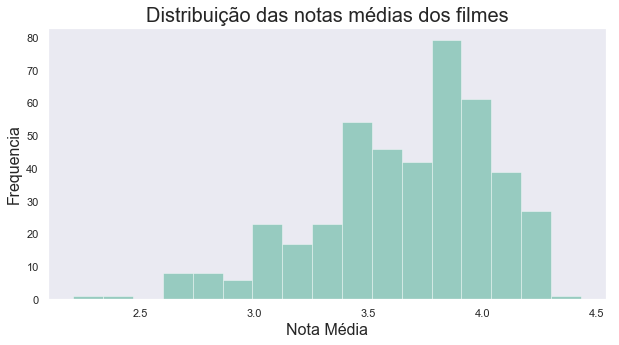

In [63]:
# solução histograma
import seaborn as sns
sns.set_palette('Dark2')
sns.set_style('dark')

ax = sns.distplot(filmes.nota_media, norm_hist = False, kde = False)
ax.figure.set_size_inches(10, 5)
ax.set_title('Distribuição das notas médias dos filmes', fontsize = 20)
ax.set_ylabel('Frequencia', fontsize = 16)
ax.set_xlabel('Nota Média', fontsize = 16)
ax

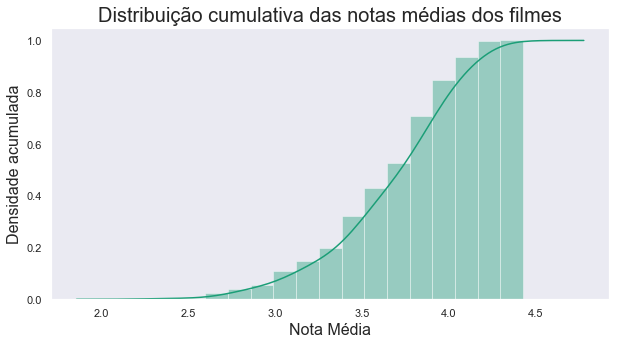

In [64]:
# solução cumulativa
ax = sns.distplot(filmes.nota_media, 
                  hist_kws = {'cumulative':True}, 
                  kde_kws = {'cumulative':True})
ax.figure.set_size_inches(10, 5)
ax.set_title('Distribuição cumulativa das notas médias dos filmes', fontsize = 20)
ax.set_ylabel('Densidade acumulada', fontsize = 16)
ax.set_xlabel('Nota Média', fontsize = 16)
ax

## Pergunta: Visualize o total de votos

- histograma
- cummulative distribution function

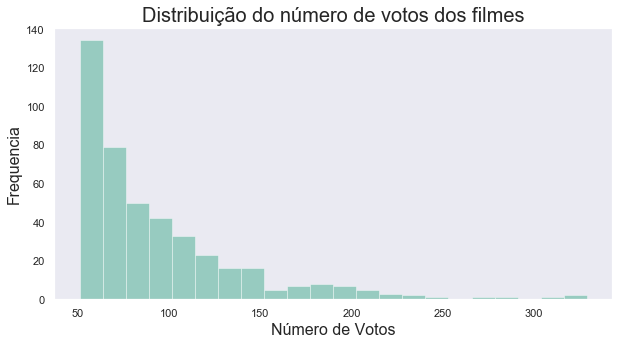

In [65]:
# solução histograma
ax = sns.distplot(filmes.total_de_votos, norm_hist = False, kde = False)
ax.figure.set_size_inches(10, 5)
ax.set_title('Distribuição do número de votos dos filmes', fontsize = 20)
ax.set_ylabel('Frequencia', fontsize = 16)
ax.set_xlabel('Número de Votos', fontsize = 16)
ax

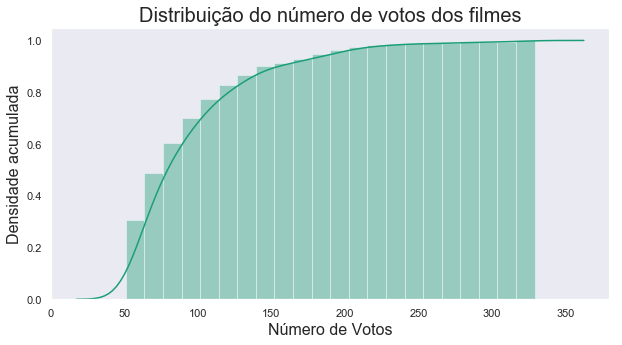

In [66]:
# solução cumulativa
ax = sns.distplot(filmes.total_de_votos, 
                  hist_kws = {'cumulative':True}, 
                  kde_kws = {'cumulative':True})
ax.figure.set_size_inches(10, 5)
ax.set_title('Distribuição do número de votos dos filmes', fontsize = 20)
ax.set_ylabel('Densidade acumulada', fontsize = 16)
ax.set_xlabel('Número de Votos', fontsize = 16)
ax

## Pergunta: 20% dos filmes do dataframe tem nota maior que? 

- lembre-se da função `quantile` do pandas

In [67]:
# solução
# Considerando apenas os filmes comm mais de 50 votos
nota_limite_dos_20_porcento = filmes.nota_media.quantile(0.8)

In [68]:
print("20 porcento dos filmes tem nota maior que de %.2f" % nota_limite_dos_20_porcento)

20 porcento dos filmes tem nota maior que de 3.99


## Vamos separar a coluna `generos` em diversas colunas.

- O código já está pronto.

In [69]:
filmes['generos'] = filmes['generos'].str.replace('-', '')
generos = filmes['generos'].str.get_dummies()
print("Temos %d generos distintos" % generos.shape[1])

Temos 19 generos distintos


In [70]:
filmes = filmes.join(generos).drop(columns=['generos'], axis=1)
filmes.head()

,titulo,ano_de_lancamento,nota_media,total_de_votos,Action,Adventure,Animation,Children,Comedy,Crime,...,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
filmeId,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),1995.0,3.920930,215.0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,Jumanji (1995),1995.0,3.431818,110.0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Grumpier Old Men (1995),1995.0,3.259615,52.0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
6,Heat (1995),1995.0,3.946078,102.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
7,Sabrina (1995),1995.0,3.185185,54.0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


## Pergunta: visualização de quantos filmes existem por genero

- Para cada um dos generos você deve agrupar o número de filmes
- Ordene as barras, na esquerda o genero com mais filmes, na direita o que tem menos filmes

Dica:

- Para fazer a soma de uma ou mais colunas individualmente você pode usar `seu_dataframe.sum()`
- Não precisa usar o dataframe `filmes`, somente o dataframe `generos`
- Em certas situações é mais fácil usar as funções de plotagem do pandas ao invés do seaborn

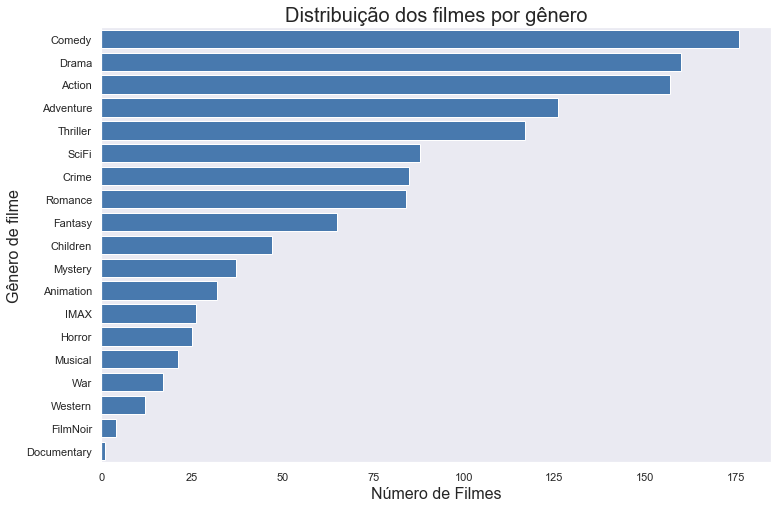

In [71]:
# solução
categorias = generos.sum().sort_values(ascending=False)

ax = sns.barplot( y = categorias.index, x = categorias.values, orient = "h", color=sns.xkcd_rgb["windows blue"])
ax.figure.set_size_inches(12, 8)
ax.set_title('Distribuição dos filmes por gênero', fontsize = 20)
ax.set_xlabel('Número de Filmes', fontsize = 16)
ax.set_ylabel('Gênero de filme', fontsize = 16)
ax

## Pergunta: Quais são os 5 generos com mais filmes?

Dica:

- `sort_values()` pode ordenar uma Series do pandas

In [72]:
# solução
top5_generos_em_quantidade_de_filmes = generos.sum().sort_values(ascending=False).head(5)

In [73]:
print(top5_generos_em_quantidade_de_filmes)

Comedy       176
Drama        160
Action       157
Adventure    126
Thriller     117
dtype: int64


## Pergunta: visualização de votos por genero

- o código que gera os votos por genero já está pronto
- ordene as categorias da mais visualizada para a menos visualizada
- gere a visualização por genero

In [74]:
votos_por_genero_por_filme = pd.DataFrame((generos.values.T * filmes['total_de_votos'].values).T, columns = generos.columns)
votos_por_genero_por_filme.head()

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
0,0.0,215.0,215.0,215.0,215.0,0.0,0.0,0.0,215.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,110.0,0.0,110.0,0.0,0.0,0.0,0.0,110.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,52.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,0.0,0.0,0.0,0.0
3,102.0,0.0,0.0,0.0,0.0,102.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,102.0,0.0,0.0
4,0.0,0.0,0.0,0.0,54.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54.0,0.0,0.0,0.0,0.0


In [75]:
# solucão
votos_por_genero_por_filme.sum().sort_values(ascending=False)

Action         15384.0
Drama          15145.0
Comedy         15080.0
Adventure      12817.0
Thriller       11707.0
SciFi           8789.0
Crime           8549.0
Romance         7394.0
Fantasy         5943.0
Children        4331.0
Mystery         3402.0
Animation       3066.0
IMAX            2392.0
Horror          2165.0
War             2013.0
Musical         1822.0
Western          900.0
FilmNoir         291.0
Documentary       58.0
dtype: float64

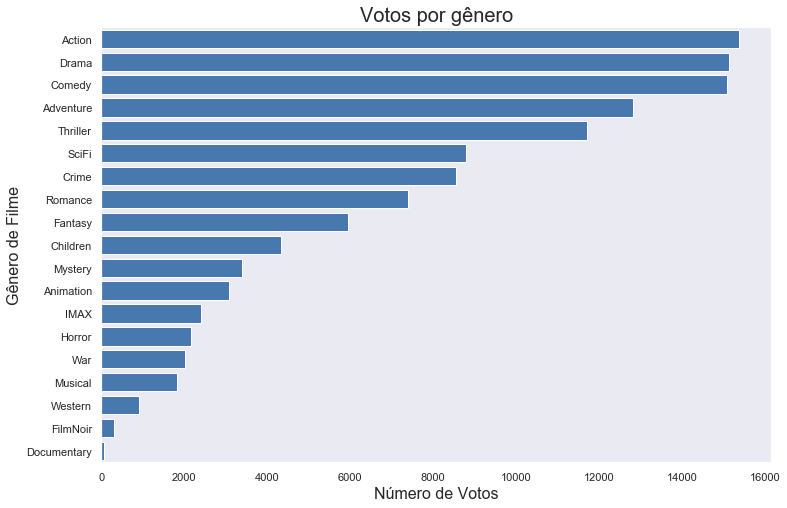

In [76]:
# solução
votos_ordenados = votos_por_genero_por_filme.sum().sort_values(ascending=False)
ax = sns.barplot( y = votos_ordenados.index, x = votos_ordenados.values, orient = "h", color=sns.xkcd_rgb["windows blue"])
ax.figure.set_size_inches(12, 8)
ax.set_title('Votos por gênero', fontsize = 20)
ax.set_xlabel('Número de Votos', fontsize = 16)
ax.set_ylabel('Gênero de Filme', fontsize = 16)
ax


## Pergunta : votos por filme por genero

Queremos entender a quantidade de votos em relação a quantidade de filmes existentes naquele genero.

Por exemplo: 
- se temos 1000 votos de `Ação` e 10 filmes desse genero, foram 100 votos por filme nesse genero.
- se o gênero `Documentário` tem 2 filmes e 500 votos, ele tem 250 votos por filme nesse gênero.

Queremos entender isso, a "popularidade" média de um filme em cada categoria, isto é, o número de votos dividido pelo número de filmes, organizado para cada categoria.

- Você já possui o número de votos por genero
- Calcule o número de votos por genero dividido pelo total de filmes por genero
- Ordene do maior para o menor
- Plote um gráfico para visualizarmos esses dados

In [77]:
# solucao código
agregados_por_genero = pd.DataFrame({'genero' : generos.sum(), 'votos' : votos_por_genero_por_filme.sum()}, dtype = 'int')
agregados_por_genero['votos_por_genero'] = agregados_por_genero['votos']/agregados_por_genero['genero']
#ordena o dataframe pelo número de votos por genero
agregados_por_genero = agregados_por_genero.sort_values(by='votos_por_genero', ascending=False)
agregados_por_genero.head()

,genero,votos,votos_por_genero
War,17,2013,118.411765
Adventure,126,12817,101.722222
Crime,85,8549,100.576471
Thriller,117,11707,100.059829
SciFi,88,8789,99.875000


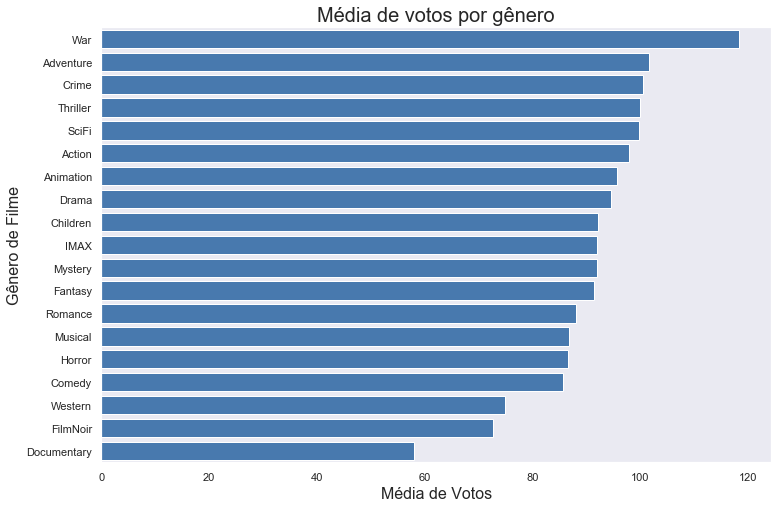

In [78]:
# solução com visualização 
ax = sns.barplot( y = agregados_por_genero.votos_por_genero.index, 
                  x = agregados_por_genero.votos_por_genero.values, 
                  orient = "h", color=sns.xkcd_rgb["windows blue"])
ax.figure.set_size_inches(12, 8)
ax.set_title('Média de votos por gênero', fontsize = 20)
ax.set_xlabel('Média de Votos', fontsize = 16)
ax.set_ylabel('Gênero de Filme', fontsize = 16)
ax

## Pergunta: Olhando as 3 últimas visualizações o que você conclui sobre os generos `Action` e `War`?

### Solução (texto livre):
Os filmes do gênero Action são bem populares. É o terceiro gênero mais produzido e o primeiro em número absoluto de votos. Além disso possui uma boa razão de votos por gênero.
Já a categoria WAR tem poucos filmes mas possui a maior razão de votos pro gênero. Não sabemos se possui uma melhor avaliação em relação aos outros gêneros, pois não foi feita essa análise. Mas podemos inferir que o público do gênero WAR possui um alto engajamento.
    

## Pergunta: Crie 2 boxplots no mesmo plot comparando a coluna `total_de_votos` dos filmes de categoria `Horror` e `Adventure`  

Dica:

- as vezes é mais fácil usar o boxplot do matplotlib ao invés do seaborn
- plt.boxplot suporta o parâmetro labels com uma lista de nomes para cada boxplot plotado

(array([1, 2]), <a list of 2 Text xticklabel objects>)

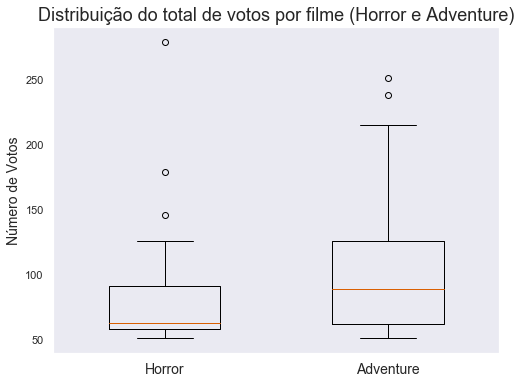

In [79]:
# solução:
import matplotlib.pyplot as plt


filmes_horror = filmes.query('Horror == True')
filmes_adventure = filmes.query('Adventure == True')


fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
ax.boxplot([filmes_horror.total_de_votos, filmes_adventure.total_de_votos],
                 widths = 0.5,
                 labels = ['Horror', 'Adventure'])
ax.set_title('Distribuição do total de votos por filme (Horror e Adventure)', fontsize = 18)
ax.set_ylabel('Número de Votos', fontsize = 14)
plt.xticks(fontsize=14)

## Pergunta: mostre agora um boxplot para cada uma das categorias

Dica:
- use generos.columns para acessar todos os gêneros
- já removemos os hífens dos nomes das colunas quando criamos as colunas de gêneros
- plt (pyplot) do matplotlib suporta a função xticks(rotation=90) para rotacionar os labels

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19]), <a list of 19 Text xticklabel objects>)

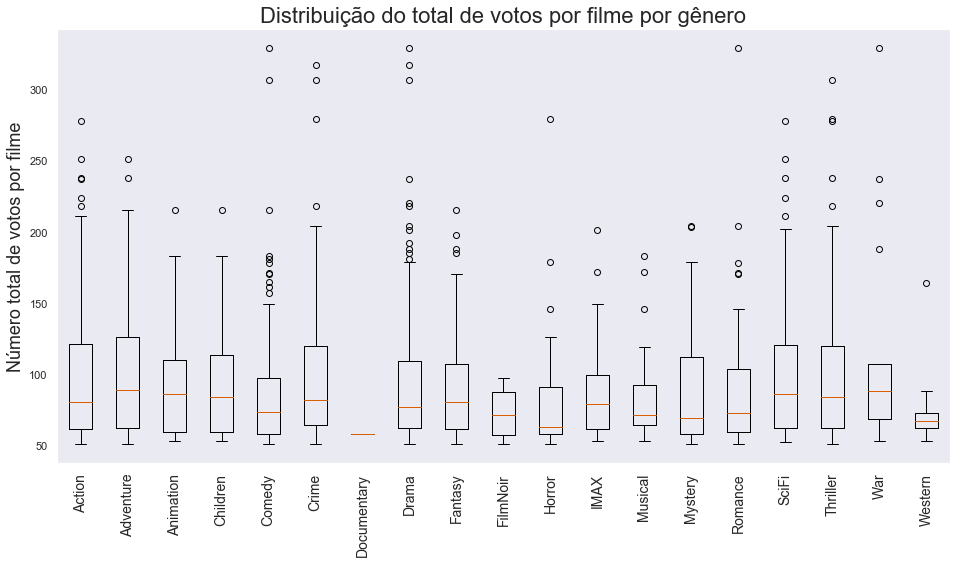

In [80]:
films_list = []
for i in generos.columns:
    films_list.append(filmes.query( i + ' == True').total_de_votos)

fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(111)
ax.boxplot(films_list,
           labels = generos.columns,
          )
ax.set_title('Distribuição do total de votos por filme por gênero', fontsize = 22)
ax.set_ylabel('Número total de votos por filme', fontsize = 18)
plt.xticks(rotation=90, fontsize=14)
    

## Pergunta: desejo criar um filme com somente um dos gêneros: `Horror` ou `Adventure`. Quero ter uma chance maior de ter um faturamento que pague minhas contas, mesmo que não seja um super sucesso absurdo de vendas. Qual dos 2 gêneros você sugere?

### Solução:
    
Entre as duas opções é aconselhável criar um filme do gênero Adveture, pois é um gênero mais popular que Horror (o Gênero Adventure é 5x mais produzido que o de Horror, se seu público é mais engajado, no sentido de dar mais notas)

## Pergunta: nossa análise foi até então visual. Aplique um teste estatístico para verificar se existe significância estatística na distribuição dos votos dos filmes de `Adventure` e `Horror`. Sua recomendação continua a mesma? Explique.

Passos:

- visualize a distribuição de ambas através de histogramas
- se suspeitar normalidade na distribuição, faça um teste de normalidade para ambas
- aplique um teste adequado de comparação das distribuições
- explique o resultado encontrado
- utilize p=0.05

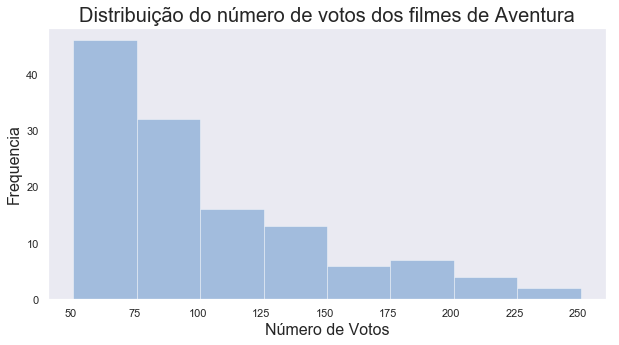

In [81]:
# solucao histograma de aventura
ax = sns.distplot(filmes_adventure.total_de_votos, norm_hist = False, kde = False, color=sns.xkcd_rgb["windows blue"])
ax.figure.set_size_inches(10, 5)
ax.set_title('Distribuição do número de votos dos filmes de Aventura', fontsize = 20)
ax.set_ylabel('Frequencia', fontsize = 16)
ax.set_xlabel('Número de Votos', fontsize = 16)
ax

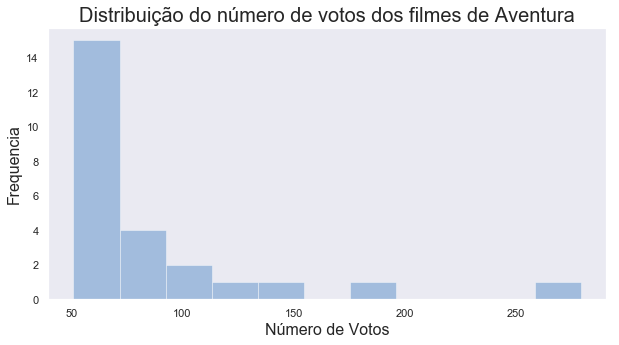

In [82]:
# solucao histograma de horror
ax = sns.distplot(filmes_horror.total_de_votos, norm_hist = False, kde = False, color=sns.xkcd_rgb["windows blue"])
ax.figure.set_size_inches(10, 5)
ax.set_title('Distribuição do número de votos dos filmes de Aventura', fontsize = 20)
ax.set_ylabel('Frequencia', fontsize = 16)
ax.set_xlabel('Número de Votos', fontsize = 16)
ax

In [83]:
# solucao teste de normalidade ou justificativa para nao utiliza-lo
from scipy.stats import normaltest

_ , p_adv = normaltest(filmes_adventure.total_de_votos)
_ , p_hor = normaltest(filmes_horror.total_de_votos)

print('O p_value do teste de normalidade da distribuição dos votos dos filmes de aventura é {}'.format(p_adv))
print('O p_value do teste de normalidade da distribuição dos votos dos filmes de horror é {}'.format(p_hor))
print('Como nos dois casos o p_value foi menor que 0.05 rejeitamos a hipótese que posseum distribição normal')

O p_value do teste de normalidade da distribuição dos votos dos filmes de aventura é 1.58724177983542e-05
O p_value do teste de normalidade da distribuição dos votos dos filmes de horror é 2.417812105177672e-07
Como nos dois casos o p_value foi menor que 0.05 rejeitamos a hipótese que posseum distribição normal


In [84]:
# solução com o teste desejado
# Como as amostras não tem distribuição normal utilizamos o teste Wilcoxon, através da função ranksums do scipy
from scipy.stats import ranksums
_, p = ranksums(filmes_adventure.total_de_votos, filmes_horror.total_de_votos)

print('O p_value encontrado foi {}'.format(p))
print('Como p_value foi menor que 0.05 rejeitamos a hipótese de que ambas as amostras pentecem a uma mesma distribuição.')
print('o que vem a ratificar nossa impressão a partir das diferença existente na visualização das amostras no boxplot.')

O p_value encontrado foi 0.029801578566891647
Como p_value foi menor que 0.05 rejeitamos a hipótese de que ambas as amostras pentecem a uma mesma distribuição.
o que vem a ratificar nossa impressão a partir das diferença existente na visualização das amostras no boxplot.


### Solução (explique sua conclusão):



## Pergunta: Faça os mesmos boxplots para as notas médias (`nota_media`) dos gêneros `Adventure` e `Horror`.

(array([1, 2]), <a list of 2 Text xticklabel objects>)

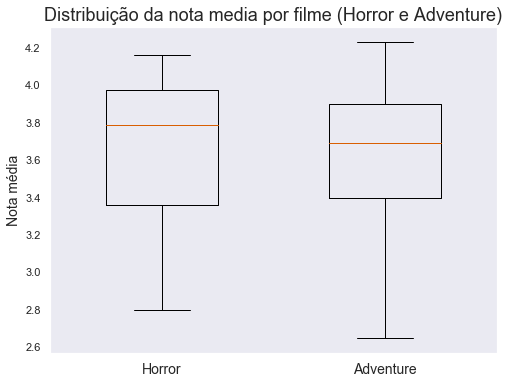

In [85]:
# solução:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
ax.boxplot([filmes_horror.nota_media, filmes_adventure.nota_media],
                 widths = 0.5,
                 labels = ['Horror', 'Adventure'])
ax.set_title('Distribuição da nota media por filme (Horror e Adventure)', fontsize = 18)
ax.set_ylabel('Nota média', fontsize = 14)
plt.xticks(fontsize=14)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19]), <a list of 19 Text xticklabel objects>)

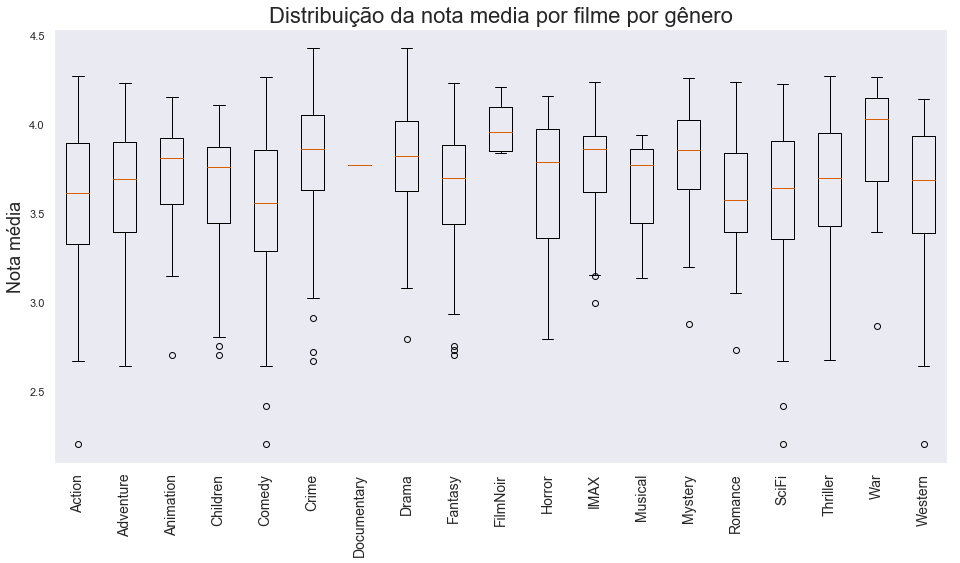

In [86]:
films_list = []
for i in generos.columns:
    films_list.append(filmes.query( i + ' == True').nota_media)

fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(111)
ax.boxplot(films_list,
           labels = generos.columns,
          )
ax.set_title('Distribuição da nota media por filme por gênero', fontsize = 22)
ax.set_ylabel('Nota média', fontsize = 18)
plt.xticks(rotation=90, fontsize=14)

## Pergunta: Quero fazer um filme que seja sucesso de crítica, com pessoas dando notas altas, mesmo que não tenha um número muito grande de pessoas assistindo. Qual gênero você recomenda se tenho que escolher somente um entre `Adventure` e `Horror`?

### Solução:

Recomendo Horror pois, pelo menos visualmente, esse gênero é mais bem avaliado que o gênero Adventure

## Pergunta: nossa análise foi até então visual. Aplique um teste estatístico para verificar se existe significância estatística na distribuição das notas dos filmes de `Adventure` e `Horror`.

Passos:

- visualize a distribuição de ambas através de histogramas
- se suspeitar normalidade na distribuição, faça um teste de normalidade para ambas
- aplique um teste adequado de comparação das distribuições
- explique o resultado encontrado
- utilize p=0.05

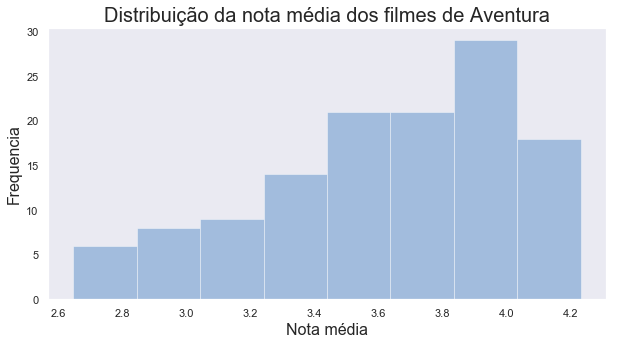

In [87]:
# solucao histograma de aventura
ax = sns.distplot(filmes_adventure.nota_media, norm_hist = False, kde = False, color=sns.xkcd_rgb["windows blue"])
ax.figure.set_size_inches(10, 5)
ax.set_title('Distribuição da nota média dos filmes de Aventura', fontsize = 20)
ax.set_ylabel('Frequencia', fontsize = 16)
ax.set_xlabel('Nota média', fontsize = 16)
ax

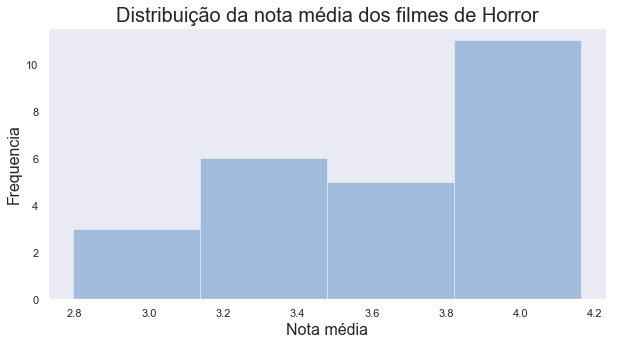

In [88]:
# solucao histograma de horror
ax = sns.distplot(filmes_horror.nota_media, norm_hist = False, kde = False, color=sns.xkcd_rgb["windows blue"])
ax.figure.set_size_inches(10, 5)
ax.set_title('Distribuição da nota média dos filmes de Horror', fontsize = 20)
ax.set_ylabel('Frequencia', fontsize = 16)
ax.set_xlabel('Nota média', fontsize = 16)
ax

In [89]:
# solucao teste de normalidade ou justificativa para nao utiliza-lo

_ , p_adv = normaltest(filmes_adventure.nota_media)
_ , p_hor = normaltest(filmes_horror.nota_media)

print('O p_value do teste de normalidade da distribuição da nota média dos filmes de aventura é {}'.format(p_adv))
print('O p_value do teste de normalidade da distribuição da nota média dos filmes de horror é {}'.format(p_hor))
print('Como o p_value foi menor que 0.05 na distribuição das notas médias dos filmes de Aventura rejeitamos a hipótese que possui distribição normal')
print('Já na distribuição das notas médias dos filmes de Horror aceitamos a hipótese que se trata de uma distribuição normal, pois p > 0.05. Apesar disso contradizer o que vemos visualmente, talvez pelo tamnaho da amostra.')

O p_value do teste de normalidade da distribuição da nota média dos filmes de aventura é 0.016341547276884364
O p_value do teste de normalidade da distribuição da nota média dos filmes de horror é 0.2893086330036122
Como o p_value foi menor que 0.05 na distribuição das notas médias dos filmes de Aventura rejeitamos a hipótese que possui distribição normal
Já na distribuição das notas médias dos filmes de Horror aceitamos a hipótese que se trata de uma distribuição normal, pois p > 0.05. Apesar disso contradizer o que vemos visualmente, talvez pelo tamnaho da amostra.


In [90]:
# solução com o teste desejado
# Como pelo menos uma amostra não tem distribuição normal utilizamos o teste Wilcoxon, através da função ranksums do scipy
_, p = ranksums(filmes_adventure.nota_media, filmes_horror.nota_media)

print('O p_value encontrado foi {}'.format(p))
print('Como p_value foi maior que 0.05 não podemos rejeitamos a hipótese de que ambas as amostras pentecem a uma mesma distribuição.')

O p_value encontrado foi 0.6759304067428379
Como p_value foi maior que 0.05 não podemos rejeitamos a hipótese de que ambas as amostras pentecem a uma mesma distribuição.


## Sua recomendação para maior sucesso de crítica em nota alta entre `Horror` e `Adventure` continua a mesma? Explique.



### Solução:
Considerando apenas as análises efetuadas, não fica claro qual seria a melhor escolha. Pois estatisticamente as amostras se equivalem. Visualmente o gênero Horror levaria uma pequena vantagem considerando apenas a nota média. 

## Pergunta: Quero fazer um filme que seja primeiro sucesso de crítica, com pessoas dando notas altas. Em segundo lugar quero que seja popular (mais pessoas assistam). Com as informações visuais e estatísticas, supondo poder escolher somente um, qual dois 2 gêneros você recomenda agora? `Horror` ou `Adventure`?

### Solução:
Nesse caso recomendaria o gênero Adventure, pois esses gêneros se equivalem no quesito nota média, mas o gênero aventura é muito mais popular.


## Pergunta: Quais são os top 5 filmes dos 2 generos mais assistidas?

- utilize os 2 generos mais votados em `votos_por_genero`
- utilize a `nota_media` para definir o top 5 filmes
- o resultado são 5, não 10 filmes

In [91]:
votos_por_genero = generos.sum().sort_values(ascending = False)
votos_por_genero

Comedy         176
Drama          160
Action         157
Adventure      126
Thriller       117
SciFi           88
Crime           85
Romance         84
Fantasy         65
Children        47
Mystery         37
Animation       32
IMAX            26
Horror          25
Musical         21
War             17
Western         12
FilmNoir         4
Documentary      1
dtype: int64

In [92]:
# solução: calculando os 2 generos mais votados
generos_mais_votados = votos_por_genero.head(2)
generos_mais_votados

Comedy    176
Drama     160
dtype: int64

In [93]:
# solução: encontrando os top 5 filmes desses generos
filmes_comedy_or_drama = filmes.query('Drama == True or Comedy == True')
filmes_comedy_or_drama_ordenados = filmes_comedy_or_drama.sort_values(by = 'nota_media', ascending = False)
filmes_comedy_or_drama_ordenados.head(5)

,titulo,ano_de_lancamento,nota_media,total_de_votos,Action,Adventure,Animation,Children,Comedy,Crime,...,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
filmeId,,,,,,,,,,,,,,,,,,,,,
318,"Shawshank Redemption, The (1994)",1994.0,4.429022,317.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
858,"Godfather, The (1972)",1972.0,4.289062,192.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2959,Fight Club (1999),1999.0,4.272936,218.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1276,Cool Hand Luke (1967),1967.0,4.271930,57.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
750,Dr. Strangelove or: How I Learned to Stop Worr...,1964.0,4.268041,97.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


## Pergunta: Quais são os 2 generos com maior valor de correlação com a `nota_media`? E os 2 com menor valor de correlação com a `nota_media`?

- O pandas possui a função `corr` para calcular correlação entre todas as colunas

In [94]:
# solucao
corr_analise = filmes.corr()['nota_media']
corr_analise = corr_analise.drop(['ano_de_lancamento', 'nota_media', 'total_de_votos'])
corr_analise = corr_analise.sort_values(ascending = False)

print('Os 2 gêneros com maior correlação:\n{}'.format(corr_analise[:2]))
print('Os 2 gêneros com menor correlação:\n{}'.format(corr_analise[-2:]))

Os 2 gêneros com maior correlação:
Drama    0.279718
Crime    0.184099
Name: nota_media, dtype: float64
Os 2 gêneros com menor correlação:
Action   -0.156240
Comedy   -0.257319
Name: nota_media, dtype: float64


## Pergunta: Quais são os 2 generos com maior correlação com `total_de_votos`? E quais os 2 com menor correlação com `total_de_votos`?

In [95]:
# solucao
corr_analise = filmes.corr()['total_de_votos']
corr_analise = corr_analise.drop(['ano_de_lancamento', 'nota_media', 'total_de_votos'])
corr_analise = corr_analise.sort_values(ascending = False)

print('Os 2 gêneros com maior correlação:\n{}'.format(corr_analise[:2]))
print('Os 2 gêneros com menor correlação:\n{}'.format(corr_analise[-2:]))

Os 2 gêneros com maior correlação:
Adventure    0.116933
War          0.109781
Name: total_de_votos, dtype: float64
Os 2 gêneros com menor correlação:
Western   -0.066546
Comedy    -0.135035
Name: total_de_votos, dtype: float64


## Pergunta: Visualize graficamente o relacionamento entre ano de lançamento e nota média

- Use o gráfico `lineplot`

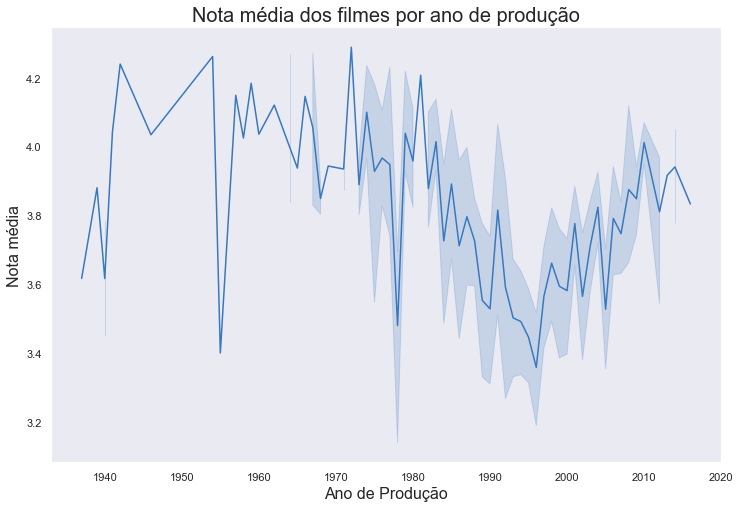

In [96]:
# solucao
ax = sns.lineplot(x="ano_de_lancamento", y="nota_media", data=filmes, color=sns.xkcd_rgb["windows blue"])
ax.figure.set_size_inches(12, 8)
ax.set_title('Nota média dos filmes por ano de produção', fontsize = 20)
ax.set_xlabel('Ano de Produção', fontsize = 16)
ax.set_ylabel('Nota média', fontsize = 16)
ax

## Pergunta: Interprete a correlação entre `ano_de_lancamento` e a `nota_media`?

- Calcule a correlação numericamente (use o `corr` do pandas)
- Correlação não implica causalidade, qual "problema" na coleta dos dados pode gerar esse tipo de correlação?

In [97]:
# solução (código)
corr_al_nm = filmes.corr()['ano_de_lancamento'].loc['nota_media']

print('A correlação entre ano_de_lancamento e nota_media é {}'.format(corr_al_nm))
print('Isso indica uma correlação fraca e negativa. Isto é, a medida que o ano aumento á uma leve tendência da nota média piorar.')
print('Mesmo que a correlação fosse forte, não poderiamos dizer que quanto mais recente o filme piores serão suas avaliações.')
print('Pois além de estamos observando apenas duas variáveis, uma correlação não implica necessariamente em causalidade')

A correlação entre ano_de_lancamento e nota_media é -0.16148236433074906
Isso indica uma correlação fraca e negativa. Isto é, a medida que o ano aumento á uma leve tendência da nota média piorar.
Mesmo que a correlação fosse forte, não poderiamos dizer que quanto mais recente o filme piores serão suas avaliações.
Pois além de estamos observando apenas duas variáveis, uma correlação não implica necessariamente em causalidade


### Solução (explicação)



## Pergunta: analise um pairplot

- crie uma variável chamada `infos` baseada nas colunas `ano_de_lancamento`, `nota_media` e `total_de_votos` de `filmes`
- faça o pairplot usando seaborn
- coloque uma regressão linear para cada pequeno plot dentro dele

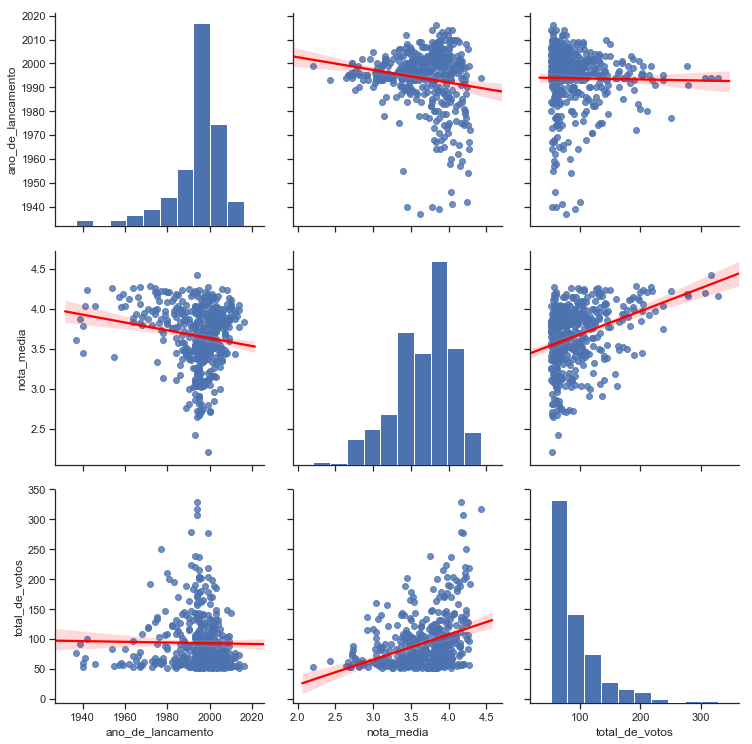

In [98]:
# solução
sns.set(style="ticks", color_codes=True)
infos = filmes[['ano_de_lancamento', 'nota_media', 'total_de_votos']]
sns.pairplot(infos, height = 3.5, kind="reg", plot_kws={'line_kws':{'color':'red'}})

## Pergunta: analise um pairplot dos filmes de `Animation`

- use o dataframe `filmes`
- em um único pairplot separe com cores distintas os filmes da categoria `Animation` dos outros
- use uma palete como `husl`
- use marcadores distintos para cada um dos dois grupos
- faça o pairplot usando seaborn e coloque uma regressão linear para cada pequeno plot dentro dele
- tanto em x quanto y use somente três variáveis: `total_de_votos`, `ano_de_lancamento`, `nota_media`

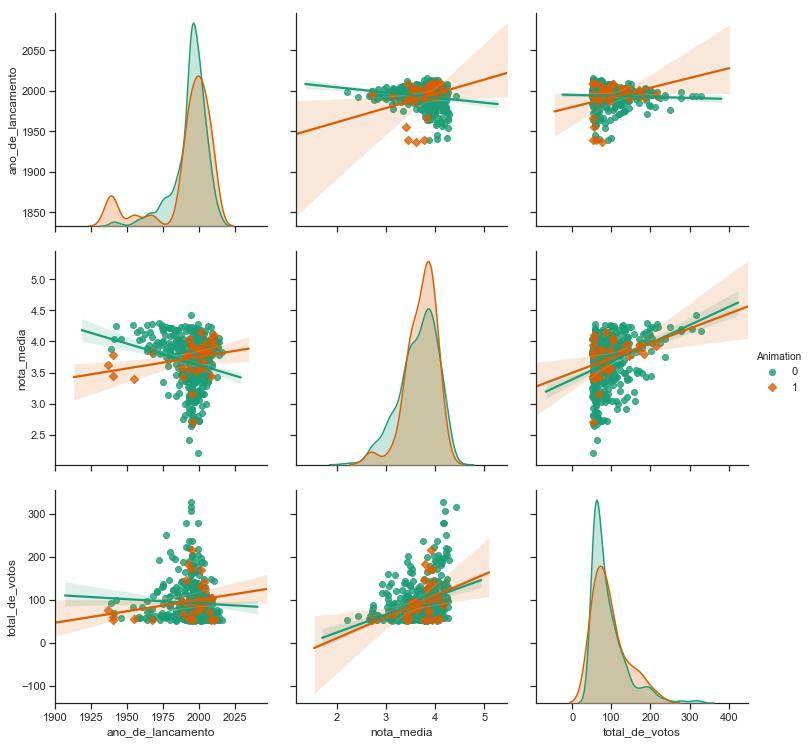

In [105]:
sns.set(style="ticks", color_codes=True)
sns.set_palette('Dark2')
sns.pairplot(filmes, height = 3.5,  hue='Animation', kind="reg",
             vars=["ano_de_lancamento", "nota_media", "total_de_votos"],
             markers=["o", "D"])

## Pergunta: Analise a regressão em relação ao ano de lançamento.

- Como parece se comportar a `nota_media` de filmes de `Animation` mais antigos e mais recentes? (ano_de_lancamento x nota_media). Essa correlação parece ser baixa, mas parece ser linear?
- E o `ano_de_lancamento` x `total_de_votos`?
- E das outras categorias? Compare isso com os outros filmes.
- O que leva você levantar como hipótese para esse resultado?

### Solução:
A. A correlação é baixa e não parece ser linear. Há muita incerteza no cálculo da regressão linear
B. Tanbém não parece ter uma relação linear. Assim como o primeiro caso há muita incerteza no cálculo da regressão linear.
C. No caso das outras categorias parece haver uma baixa correlação, quase não há inclinação na reta.
D. A hipótese é que não há uma relação direta entre ano de lançamento e avaliação dos filmes.


## Pergunta: Explore

- compartilhe conosco 2 visualizações extras que julgar interessante
- explique o que encontrou
- use quantas células (texto ou código) julgar necessário

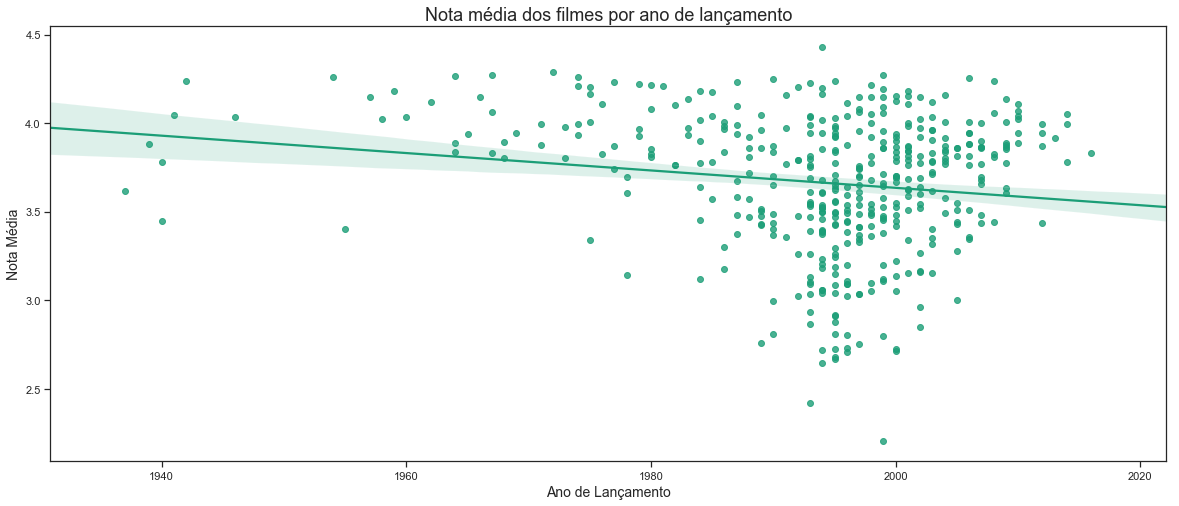

In [115]:
# solução
ax = sns.regplot(x = filmes.ano_de_lancamento, y = filmes.nota_media)
ax.figure.set_size_inches(20, 8)
ax.set_title('Nota média dos filmes por ano de lançamento', fontsize = 18)
ax.set_xlabel('Ano de Lançamento', fontsize = 14)
ax.set_ylabel('Nota Média', fontsize = 14)
ax

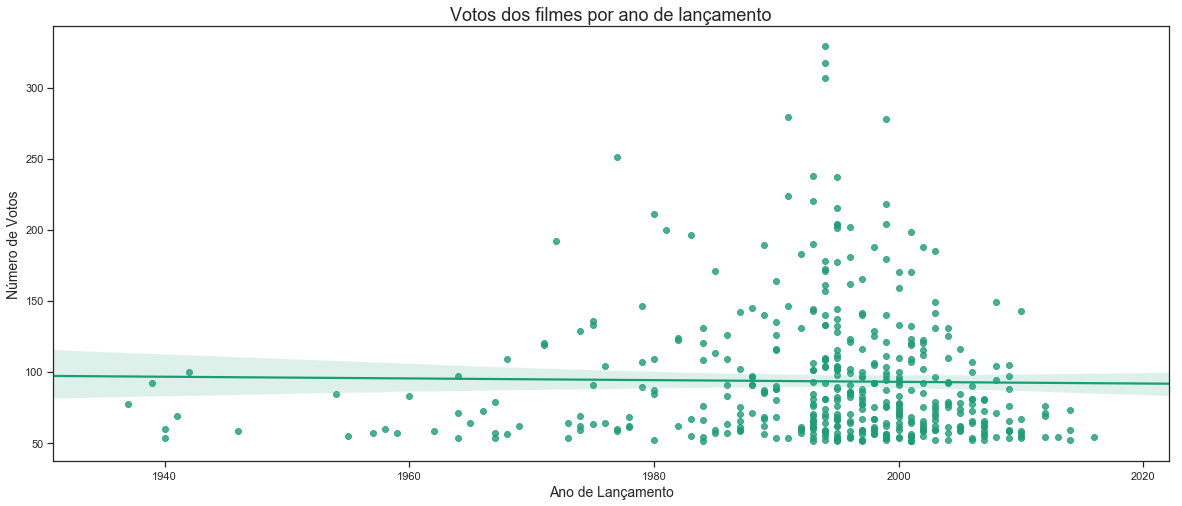

In [116]:
ax = sns.regplot(x = filmes.ano_de_lancamento, y = filmes.total_de_votos)
ax.figure.set_size_inches(20, 8)
ax.set_title('Votos dos filmes por ano de lançamento', fontsize = 18)
ax.set_xlabel('Ano de Lançamento', fontsize = 14)
ax.set_ylabel('Número de Votos', fontsize = 14)
ax